In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [116]:
def show_prior(measurements, 
               semi_informative_mass=0.997, 
               n=1e5, cut_at_mass=1e-3, 
               include_norm=False,
               include_loguni=False,
               include_exp=False,
               agnostic_bounds=[],
              ):

    n=int(n)
    
    obs = np.array(measurements)
    obs_e = np.log(obs)
    obs_10 = np.log10(obs)

    mean_e = np.mean(obs_e)
    std_e = np.std(obs_e)
    mean_10 = np.mean(obs_10)
    std_10 = np.std(obs_10)

    distr_log_e = sps.norm(loc = mean_e,scale=std_e)
    distr_log_10 = sps.norm(loc = mean_10,scale=std_10)
    min_log = min(distr_log_e.ppf(cut_at_mass),distr_log_10.ppf(cut_at_mass))
    max_log = max(distr_log_e.ppf(1-cut_at_mass),distr_log_10.ppf(1-cut_at_mass))
    x_log = np.linspace(min_log,max_log,n)
    y_log_e = distr_log_e.pdf(x_log)
    y_log_10 = distr_log_10.pdf(x_log)

 
    distr_lin_e = sps.lognorm(s=std_e,scale=np.exp(mean_e))
    distr_lin_10 = sps.lognorm(s=std_10*np.log(10),scale=np.exp(mean_10*np.log(10)))
    min_lin = min(distr_lin_e.ppf(1e-3),distr_lin_10.ppf(1e-3))
    min_lin = 0
    max_lin = max(distr_lin_e.ppf(1-1e-3),distr_lin_10.ppf(1-1e-3))
    x_lin = np.linspace(min_lin,max_lin,n)
    y_lin_e = distr_lin_e.pdf(x_lin)
    y_lin_10 = distr_lin_10.pdf(x_lin)

    mean = np.mean(obs)
    std = np.std(obs)
    if include_norm:
        distr_norm = sps.norm(scale=std, loc=mean)
        y_norm = distr_norm.pdf(x_lin)

    if include_loguni:
        min_lin_loguni = min(distr_lin_e.ppf(1e-3),distr_lin_10.ppf(1e-3))
        distr_loguni = sps.loguniform(min_lin_loguni,max_lin)
        x_lin_loguni = np.linspace(min_lin_loguni, max_lin, n)
        y_loguni = distr_loguni.pdf(x_lin_loguni)


    distr_exp = sps.expon(scale=mean)
    y_exp = distr_exp.pdf(x_lin)

    bounded_area=semi_informative_mass
    lower_log_e = distr_log_e.ppf((1-bounded_area)/2)
    upper_log_e = distr_log_e.ppf(1-(1-bounded_area)/2)
    lower_log_10 = distr_log_10.ppf((1-bounded_area)/2)
    upper_log_10 = distr_log_10.ppf(1-(1-bounded_area)/2)
    lower_lin_e = distr_lin_e.ppf((1-bounded_area)/2)
    upper_lin_e = distr_lin_e.ppf(1-(1-bounded_area)/2)
    lower_lin_10 = distr_lin_10.ppf((1-bounded_area)/2)
    upper_lin_10 = distr_lin_10.ppf(1-(1-bounded_area)/2)
    lower_loglin_e = np.exp(lower_log_e) 
    upper_loglin_e = np.exp(upper_log_e) 
    lower_loglin_10 = 10**(lower_log_10) 
    upper_loglin_10 = 10**(upper_log_10) 

    samps_log_e = np.random.randn(n)*std_e+mean_e
    samps_lin_e = np.exp(samps_log_e)
    samps_log_10 = np.random.randn(n)*std_10+mean_10
    samps_lin_10 = 10**samps_log_10

    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(1,2,1)
    _=plt.hist(samps_log_e, bins=50, color='b', alpha=0.5, density=True,range=[min_log,max_log])
    _=plt.hist(samps_log_10, bins=50, color='g', alpha=0.5, density=True,range=[min_log,max_log])
    plt.plot(x_log,y_log_e,color='b',linestyle='-',alpha=0.5)
    plt.plot(x_log,y_log_10,color='g',linestyle='-',alpha=0.5)
    plt.axvline(lower_log_e, color='b',linestyle=':',alpha=0.5)
    plt.axvline(upper_log_e, color='b',linestyle=':',alpha=0.5)
    plt.axvline(lower_log_10, color='g',linestyle=':',alpha=0.5)
    plt.axvline(upper_log_10, color='g',linestyle=':',alpha=0.5)
    for ob in obs_e:
        plt.plot([ob],[0],'bx',)
    for ob in obs_10:
        plt.plot([ob],[0],'gx',)
    fig.add_subplot(1,2,2)
    _=plt.hist(samps_lin_e, bins=50, color='b', alpha=0.5, range=[min_lin,max_lin], density=True)
    _=plt.hist(samps_lin_10, bins=50, color='g', alpha=0.5, range=[min_lin,max_lin], density=True)
    plt.plot(x_lin,y_lin_e,color='b', linestyle='-',alpha=0.5)
    plt.plot(x_lin,y_lin_10,color='g', linestyle='-',alpha=0.5)
    if include_norm: plt.plot(x_lin,y_norm,color='r', linestyle='--',alpha=0.5)
    if include_exp: 
        plt.plot(x_lin,y_exp,color='c', linestyle='--',alpha=0.5)
        plt.axvline(distr_exp.ppf(semi_informative_mass), color='c',linestyle=':',alpha=0.25)
    if include_loguni: plt.plot(x_lin_loguni,y_loguni,color='m', linestyle='--',alpha=0.5)
    plt.axvline(lower_loglin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(upper_loglin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(lower_loglin_10, color='g',linestyle=':',alpha=0.25)
    plt.axvline(upper_loglin_10, color='g',linestyle=':',alpha=0.25)
    plt.axvline(lower_lin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(upper_lin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(lower_lin_10, color='g',linestyle=':',alpha=0.25)
    plt.axvline(upper_lin_10, color='g',linestyle=':',alpha=0.25)
    if len(agnostic_bounds) == 2:
        plt.axvspan(agnostic_bounds[0], agnostic_bounds[1], color='k', alpha=0.1)
    for ob in obs:
        plt.plot([ob],[0],'kx',)
        
    print("mean (log10): {0:.2f} [= log10({1:.2f})]".format(mean_10,10**mean_10))
    print("sigma (log10): {0:.2f}".format(std_10,))
    print()
    print("lower bound (log10): {0:.2f}".format(lower_log_10))
    print("Upper bound (log10): {0:.2f}".format(upper_log_10))
    print()
    print("mean (linear): {0:.2f}".format(mean))
    print("sigma (linear): {0:.2f}".format(std))
    print()
    print("lower bound (linear): {0:.2f}".format(lower_lin_e))
    print("Upper bound (linear): {0:.2f}".format(upper_lin_e))
    print()
    print("Exponential upper bound: {0:.2f}".format(distr_exp.ppf(semi_informative_mass)))





In [117]:
mass = 0.997

In [118]:
relative_error = 0.5

In [119]:
assumed_sigma=1

mean (log10): 1.66 [= log10(46.00)]
sigma (log10): 0.21

lower bound (log10): 1.04
Upper bound (log10): 2.28

mean (linear): 51.43
sigma (linear): 23.00

lower bound (linear): 11.03
Upper bound (linear): 191.86

Exponential upper bound: 298.76


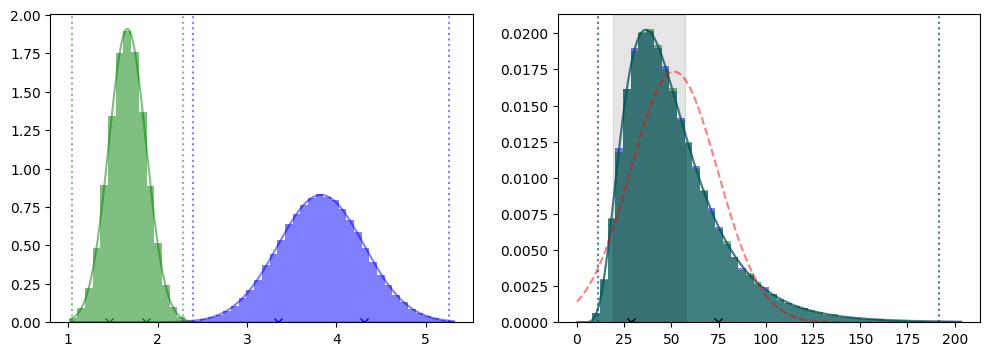

In [130]:
# 1st e-normalization
agnostic_bounds = [19,57]
center=0.046*1e3
center_vacca = 1
upper_vacca= relative_error
lower_vacca = relative_error

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

mean (log10): 0.62 [= log10(4.16)]
sigma (log10): 0.21

lower bound (log10): -0.00
Upper bound (log10): 1.24

mean (linear): 4.65
sigma (linear): 2.08

lower bound (linear): 1.00
Upper bound (linear): 17.35

Exponential upper bound: 27.02


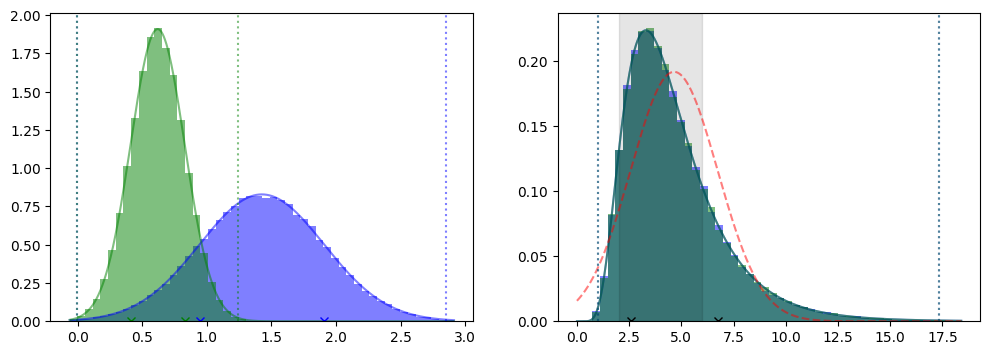

In [131]:
# 2nd e-normalization
agnostic_bounds = [2,6]
center=0.00416*1e3
center_vacca = 1
upper_vacca= relative_error
lower_vacca = relative_error

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

mean (log10): 1.76 [= log10(57.00)]
sigma (log10): 0.21

lower bound (log10): 1.14
Upper bound (log10): 2.38

mean (linear): 63.73
sigma (linear): 28.50

lower bound (linear): 13.67
Upper bound (linear): 237.74

Exponential upper bound: 370.20


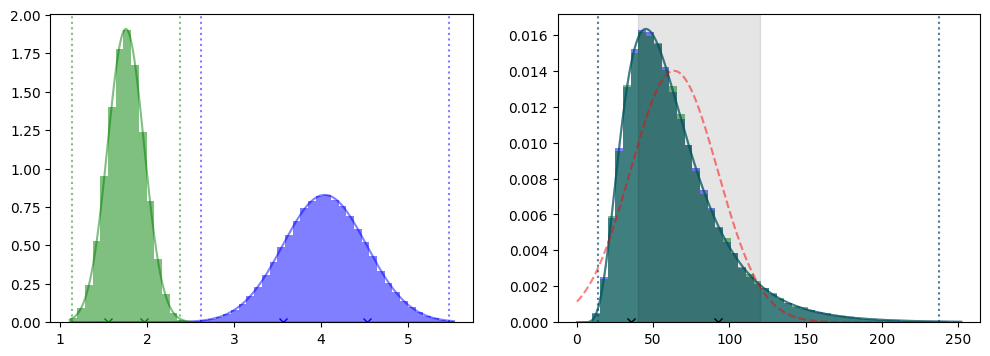

In [132]:
# 1st e-density parameter (r1)
agnostic_bounds = [40,120]
center=57
center_vacca = 1
upper_vacca= relative_error
lower_vacca = relative_error

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

mean (log10): 2.43 [= log10(269.00)]
sigma (log10): 0.21

lower bound (log10): 1.81
Upper bound (log10): 3.05

mean (linear): 300.75
sigma (linear): 134.50

lower bound (linear): 64.50
Upper bound (linear): 1121.95

Exponential upper bound: 1747.11


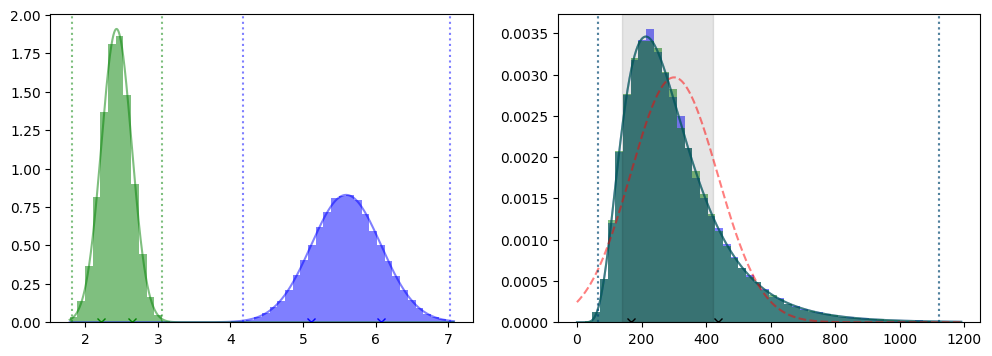

In [133]:
# 2nd e-density parameter (r2)
agnostic_bounds = [140,420]
center=269
center_vacca = 1
upper_vacca= relative_error
lower_vacca = relative_error

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

mean (log10): 0.08 [= log10(1.20)]
sigma (log10): 0.21

lower bound (log10): -0.54
Upper bound (log10): 0.70

mean (linear): 1.34
sigma (linear): 0.60

lower bound (linear): 0.29
Upper bound (linear): 5.00

Exponential upper bound: 7.79


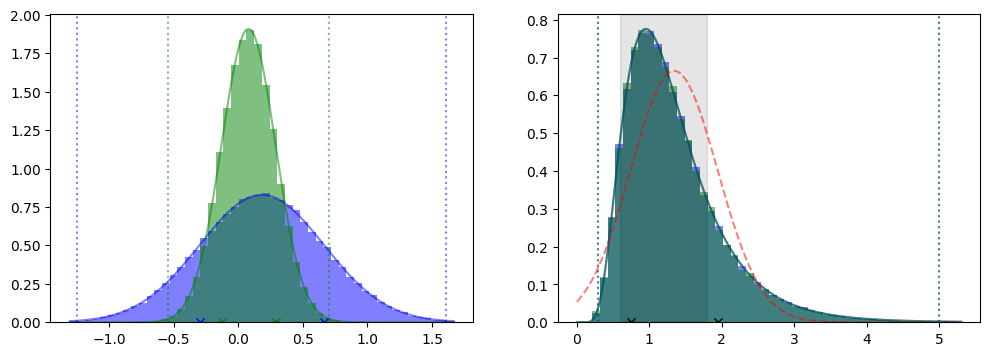

In [134]:
# 3rd e-density parameter (beta1)
agnostic_bounds = [0.6,1.8]
center=1.2
center_vacca = 1
upper_vacca= relative_error
lower_vacca = relative_error

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

mean (log10): -0.16 [= log10(0.69)]
sigma (log10): 0.21

lower bound (log10): -0.78
Upper bound (log10): 0.46

mean (linear): 0.77
sigma (linear): 0.34

lower bound (linear): 0.17
Upper bound (linear): 2.88

Exponential upper bound: 4.48


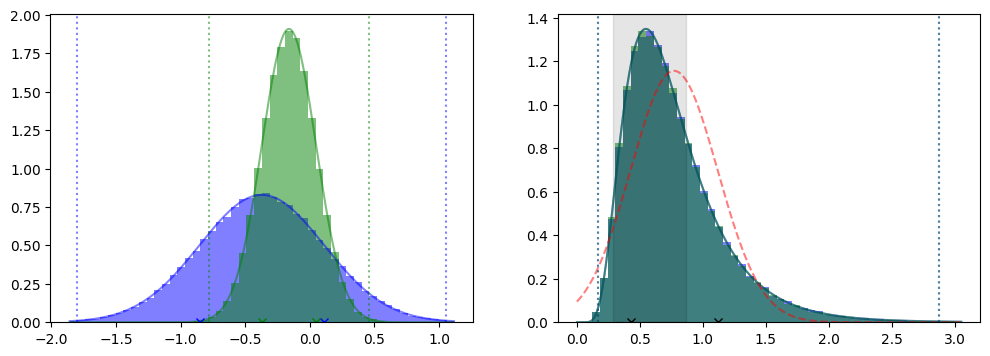

In [135]:
# 4th e-density parameter (beta2)
agnostic_bounds = [0.29,0.87]
center=0.69
center_vacca = 1
upper_vacca= relative_error
lower_vacca = relative_error

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

In [145]:
30*3600

108000